In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_moons

# Generate linearly separable data
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=42)

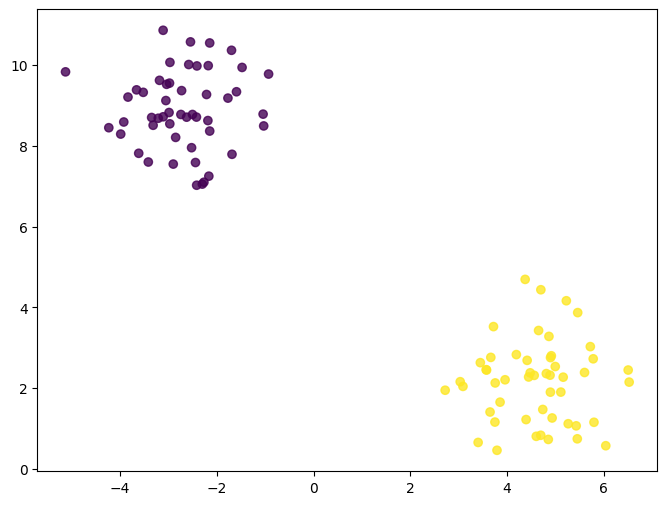

In [3]:
# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, alpha=0.8)
plt.show()


In [4]:
# Create and train linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_linear, y_linear)

SVC(kernel='linear', random_state=42)

In [5]:
# Code for plotting

def plot_decision_boundary(X, y, model, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.show()


def get_hyperplane_points(model, x_range):
    # Get w and b from the model
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # Calculate points for decision boundary and margins
    x0_points = x_range
    x1_points_boundary = -(w[0] * x0_points + b) / w[1]
    x1_points_margin_pos = -(w[0] * x0_points + b - 1) / w[1]
    x1_points_margin_neg = -(w[0] * x0_points + b + 1) / w[1]
    
    return x1_points_boundary, x1_points_margin_pos, x1_points_margin_neg

def plot_svm_decision_boundary(X, y, model, title):
    # Calculate exact data boundaries
    margin = 0.2  # smaller margin for tighter plot
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
    
    # Create tighter mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    
    plt.figure(figsize=(8, 6))  # square aspect ratio
    
    # Plot decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, label='Data points')
    
    # Plot support vectors
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none',
               edgecolors='red', label='Support Vectors')
    
    # For linear SVM, plot margin lines
    if model.kernel == 'linear':
        x0_range = np.linspace(x_min, x_max, 200)
        x1_boundary, x1_margin_pos, x1_margin_neg = get_hyperplane_points(model, x0_range)
        
        plt.plot(x0_range, x1_boundary, 'k-', label='Decision Boundary')
        plt.plot(x0_range, x1_margin_pos, 'k--', label='Margin Lines')
        plt.plot(x0_range, x1_margin_neg, 'k--')
    
    plt.title(title)
    plt.legend()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.tight_layout()
    plt.show()

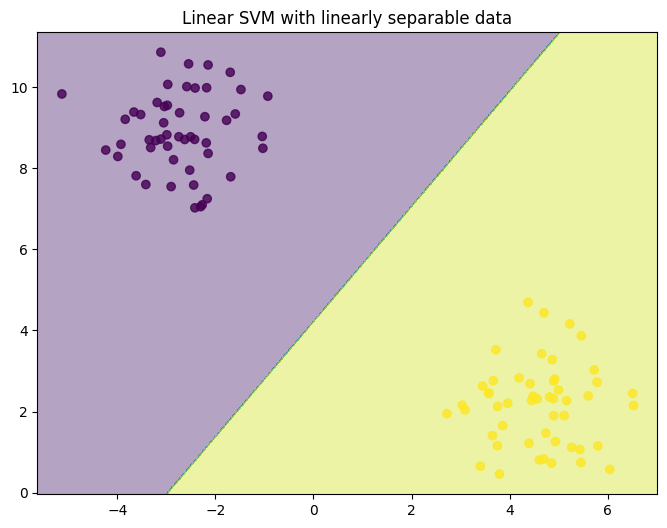

In [6]:
plot_decision_boundary(X_linear, y_linear, svm_linear, "Linear SVM with linearly separable data")

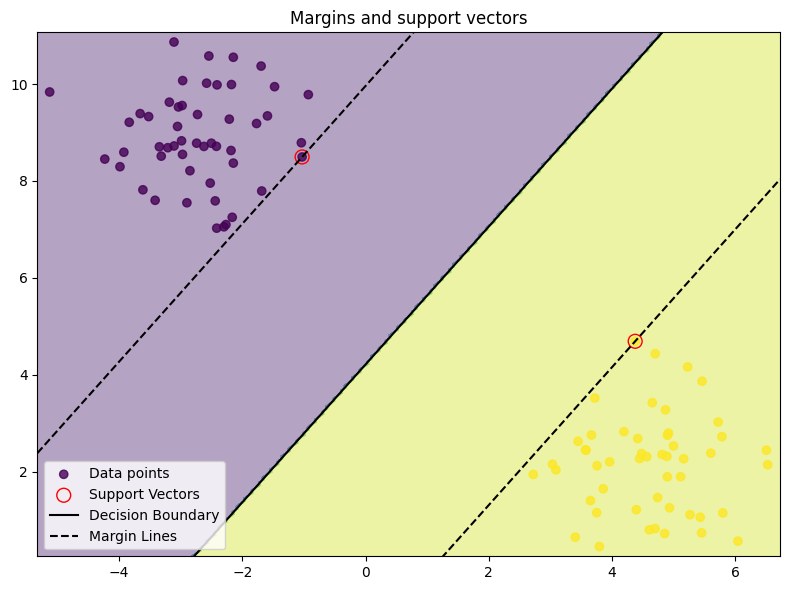

In [7]:
plot_svm_decision_boundary(X_linear, y_linear, svm_linear, "Margins and support vectors")

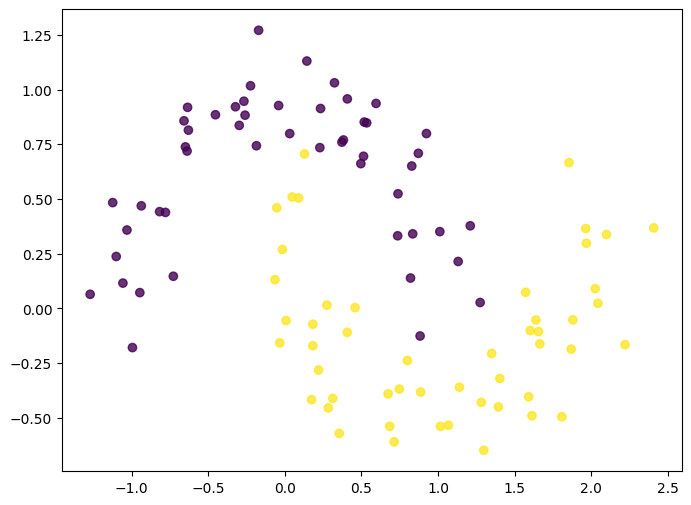

In [8]:
# Generate non-linearly separable data
X_nonlinear, y_nonlinear = make_moons(n_samples=100, noise=0.15, random_state=42)


# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X_nonlinear[:, 0], X_nonlinear[:, 1], c=y_nonlinear, alpha=0.8)
plt.show()

In [12]:
# Train a hard-margin SVM with RBF kernel

# The parameter `C` is set to a very large value (1e10) to simulate a hard-margin SVM: i.e., not allowing any points breaking the constraints
svm_nonlinear = SVC(kernel='rbf', random_state=42, C=1e10)
svm_nonlinear.fit(X_nonlinear, y_nonlinear)

SVC(C=10000000000.0, random_state=42)

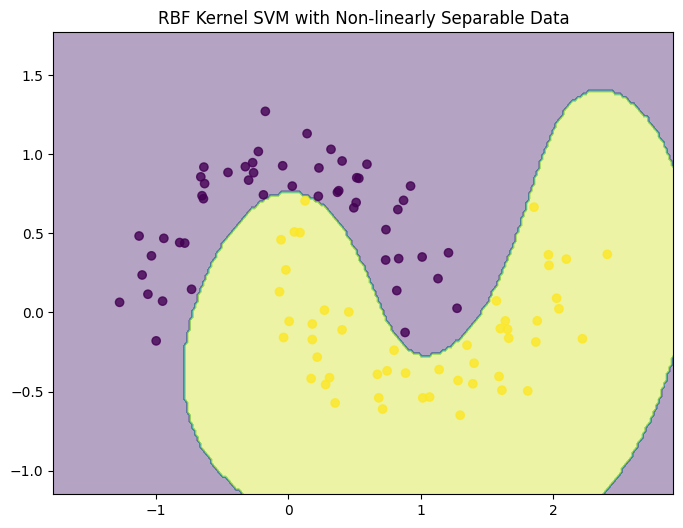

In [13]:
# Note how the RBF kernel creates a non-linear decision boundary in the original feature space
plot_decision_boundary(X_nonlinear, y_nonlinear, svm_nonlinear, "RBF Kernel hard-margin SVM with Non-linearly Separable Data")

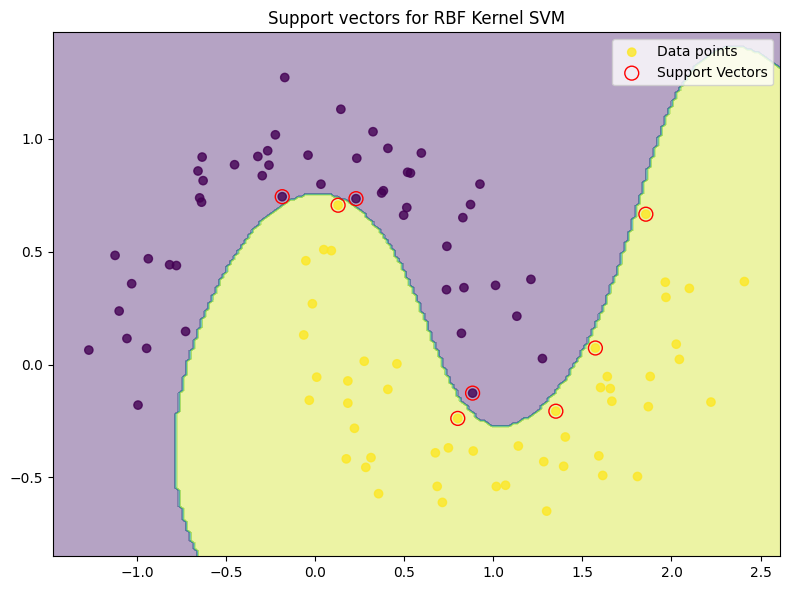

In [14]:
# Show support vectors
plot_svm_decision_boundary(X_nonlinear, y_nonlinear, svm_nonlinear, "Support vectors for RBF Kernel hard-margin SVM")

In [15]:
# Train a soft-margin SVM with RBF kernel
svm_nonlinear = SVC(kernel='rbf', random_state=42, C=1)
svm_nonlinear.fit(X_nonlinear, y_nonlinear)

SVC(C=1, random_state=42)

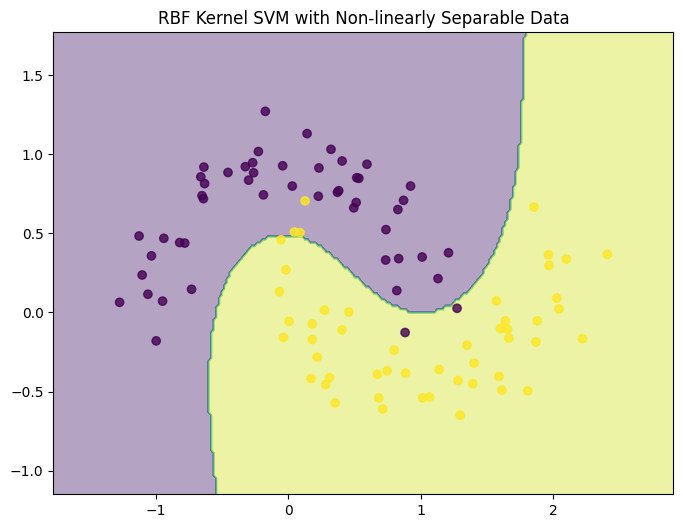

In [16]:
# Some of the points are misclassified, but the decision boundary is smoother
plot_decision_boundary(X_nonlinear, y_nonlinear, svm_nonlinear, "RBF Kernel soft-margin SVM with Non-linearly Separable Data")

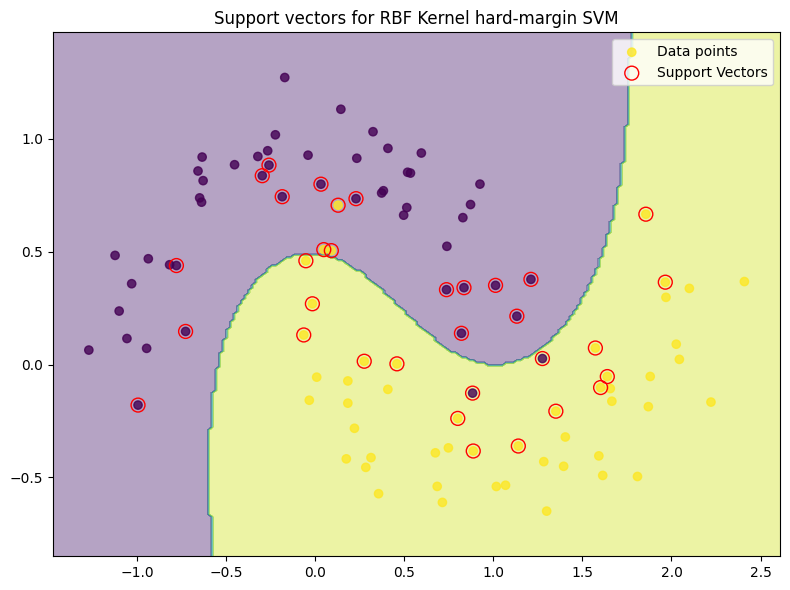

In [17]:
# Support vectors are now also inside the margin
plot_svm_decision_boundary(X_nonlinear, y_nonlinear, svm_nonlinear, "Support vectors for RBF Kernel hard-margin SVM")